# Back to the physical modes

In [242]:
import h5py
import numpy as np
#import cmath for complex number operations
import cmath
import scipy
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.style as style 
import matplotlib.pyplot as pl

from contextlib import redirect_stdout
from scipy.optimize import curve_fit
from scipy import interpolate
style.use('tableau-colorblind10')
matplotlib.rcParams.update({'font.size': 12})

In [119]:
path = "/home/berkane/Documents/stage/simulations/"

# path to work from personal computer
# path = "/home/angela/Documents/stage/simulations/alpha_lit=0.01/"

# Results for alpha_lit=0.01
sx_res = h5py.File(path+"coherence_time/extended_results.jld", "r")
sz_res = h5py.File(path+"spin_boson_alpha_s/extended_results.jld", "r")

# Results for alpha_lit=0.05
sx_strong = h5py.File(path+"sx/extended_results.jld", "r")
sz_strong = h5py.File(path+"sz/extended_results.jld", "r")

# Results for alpha_lit=0.3
sz_s3 = h5py.File(path+"pair_corr_super/extended_results.jld", "r")
sx_s3 = h5py.File(path+"pair_corr_super_sx/extended_results.jld", "r")

N = 120
M = 700
beta = ["2.0", "20.0", "200.0", "2000.0"]
s = ["0.5", "1.0", "2.0", "3.0", "4.0", "5.0"]
smin = ["1.0", "2.0", "3.0", "4.0", "5.0"]
snew = ["0.5", "1.0", "2.0", "3.0", "4.0"]

tem = ["10", "50", "80", "100"]

In [120]:
list(sz_s3["2.0/3.0"].keys())

['bond_dims',
 'bond_dims_1',
 'bond_dims_2',
 'bond_dims_3',
 'bond_dims_4',
 'chain_occup_1',
 'chain_occup_2',
 'chain_occup_3',
 'chain_occup_4',
 'coeff_c',
 'coeff_e',
 'coeff_t',
 'constr_matr_1',
 'constr_matr_2',
 'constr_matr_3',
 'constr_matr_4',
 'corr_constr_1',
 'corr_constr_2',
 'corr_constr_3',
 'corr_constr_4',
 'corr_destr_1',
 'corr_destr_2',
 'corr_destr_3',
 'corr_destr_4',
 'destr_matr_1',
 'destr_matr_2',
 'destr_matr_3',
 'destr_matr_4',
 'mean_constr_1',
 'mean_constr_2',
 'mean_constr_3',
 'mean_constr_4',
 'mean_destr_1',
 'mean_destr_2',
 'mean_destr_3',
 'mean_destr_4',
 'occup_1',
 'occup_2',
 'occup_3',
 'occup_4',
 'omega',
 'pair_matr_constr_1',
 'pair_matr_constr_2',
 'pair_matr_constr_3',
 'pair_matr_constr_4',
 'pair_matr_destr_1',
 'pair_matr_destr_2',
 'pair_matr_destr_3',
 'pair_matr_destr_4',
 'sx',
 'sz',
 'times']

In [252]:
fold = ["s=2_beta=2/", "s=2_beta=2000/"]
inve = ["2.0", "2000.0"]

import sys

count = 0
for fol in fold:
    with open(fol + 'occup.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/occup_4"][()]))
    with open(fol + 'omega.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/omega"][()]))
    with open(fol + 'constr.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/corr_constr_4"][()]))
    with open(fol + 'destr.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/corr_constr_4"][()]))
    count+=1

In [253]:
sys.getsizeof(sz_res["2.0/2.0/corr_constr_4"][()])

7840112

In [269]:
def cosine(omega, bet):
    return 1/np.sqrt(1-np.exp(-omega*float(bet)))

def sine(omega, bet):
    return 1/np.sqrt(-1+np.exp(omega*float(bet)))

def physical_occup(res, b, s):
    corr_constr = res[b+"/"+s+"/corr_constr_4"][()]    
    corr_destr = res[b+"/"+s+"/corr_destr_4"][()]
    occup = res[b+"/"+s+"/occup_4"][()]
    omega = res[b+"/"+s+"/omega"][()]
    
    x = np.linspace(-1, 1, M)
    y = np.linspace(-1, 1, M)
    #X, Y = np.meshgrid(x, y)

    occup_new = interpolate.interp1d(omega, occup, kind='linear', fill_value='extrapolate')
    #print(occup_new(x))
    corr_constr = interpolate.interp2d(omega, omega, abs(corr_constr), kind='linear')
    #corr_constr_new = corr_constr(x, y) 
    corr_destr = interpolate.interp2d(omega, omega, abs(corr_destr), kind='linear')
    #corr_destr_new = corr_destr(x, y)
    
    Mhalf = int(M*0.5)
    phys_occ = []
    for el in range(1,Mhalf+1):
        ipos = int(M*0.5)+el-1
        ineg = int(M*0.5)-el
        occ = (cosine(x[ipos],b)*sine(x[ipos],b)*(corr_destr(x[ineg],x[ipos]) + corr_constr(x[ipos],x[ineg])) 
                    + cosine(x[ipos], b)**2*(occup_new(x[ipos])) + sine(x[ipos], b)**2*(1+occup_new(x[ineg])))
        phys_occ.append(occ)
    pl.plot(x[Mhalf:M], np.squeeze(phys_occ), )
    ax = pl.gca()
    #ax.set_ylim([0.9, 1.5])
    pl.show()

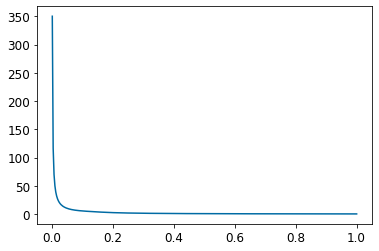

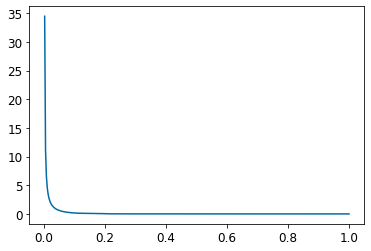

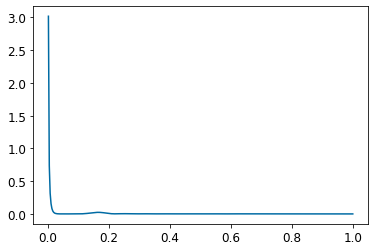

<ipython-input-269-f9057d4b2a9d>:5: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(-1+np.exp(omega*float(bet)))


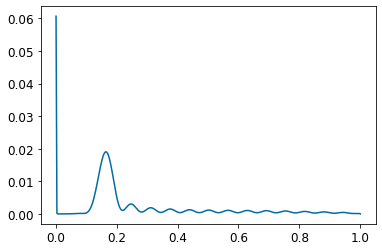

In [270]:
for el in beta:
    physical_occup(sz_res, el, "2.0")

In [93]:
x = np.linspace(-1, 1, 700)
x[int(M*0.5)-1]


-0.0014306151645206988

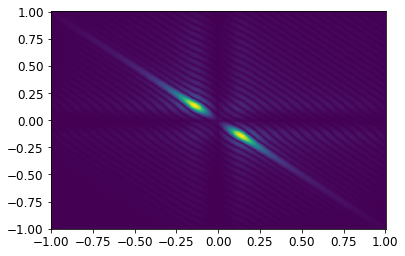

In [72]:
constr_matr = sx_res["2.0/2.0/constr_matr_4"][()]
pair_constr = sx_res["2.0/2.0/corr_constr_4"][()]   
omega = sx_res["2.0/2.0/omega"][()]



x = np.linspace(-1, 1, 700)
y = np.linspace(-1, 1, 700)
X, Y = np.meshgrid(x, y)

fconstr = interpolate.interp2d(omega, omega, abs(pair_constr), kind='linear')
Z = fconstr(x, y)

pl.pcolormesh(X, Y, Z, shading='auto')
pl.show()

In [64]:
f(0.5, 0)*2

array([0.00034234])